In [1]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
db_user = 'postgres'
db_password = 'password'
db_host = 'localhost'
db_port = '5432'
db_name = 'gas_station'

connection_string = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

engine = create_engine(connection_string)
query = 'SELECT * FROM omv_interpolated_2 ORDER BY timestamp'

interpolated_df = pd.read_sql(query, engine)
interpolated_df.set_index('timestamp', inplace=True)
interpolated_df.head()

,e5
timestamp,
2023-01-01 05:00:00+00:00,1662.513793
2023-01-01 05:30:00+00:00,1667.824310
2023-01-01 06:00:00+00:00,1673.134828
2023-01-01 06:30:00+00:00,1678.445346
2023-01-01 07:00:00+00:00,1681.769601


In [7]:
query = 'SELECT date, e5 FROM omv ORDER BY date'

real_df = pd.read_sql(query, engine)
real_df.set_index('date', inplace=True)
real_df.head()

,e5
date,
2023-01-01 04:40:09+00:00,1659
2023-01-01 05:32:08+00:00,1929
2023-01-01 06:33:08+00:00,1679
2023-01-01 06:40:10+00:00,1659
2023-01-01 11:24:09+00:00,1709


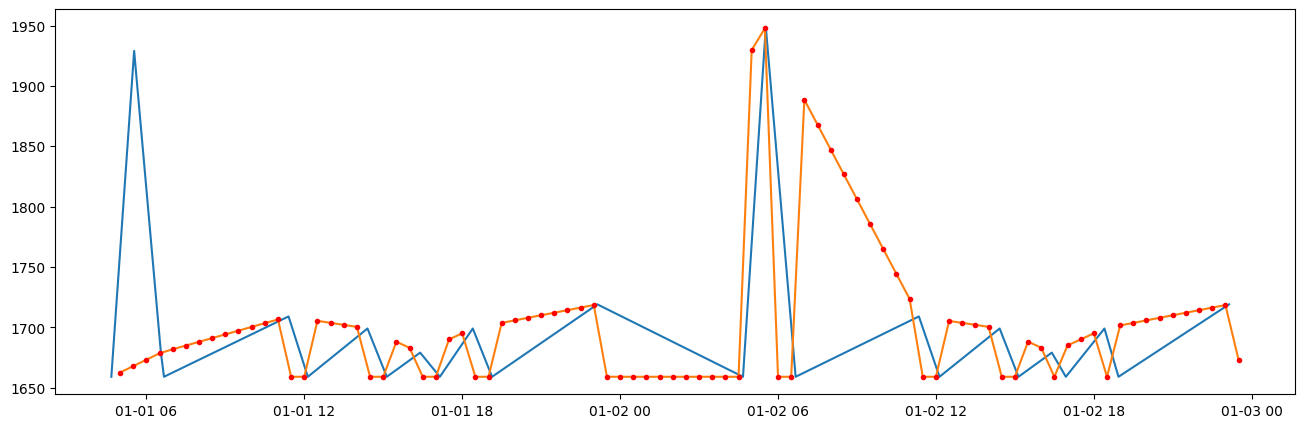

In [11]:
start_date = '2023-01-01'
end_date = '2023-01-02'

first_week_interpolated_df = interpolated_df[start_date:end_date]
first_week_real_df = real_df[start_date:end_date]

plt.figure(figsize=(16, 5))
plt.plot(first_week_real_df['e5'])
plt.plot(first_week_interpolated_df['e5'])
plt.plot(first_week_interpolated_df['e5'], 'r.')
plt.show()